In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import layers

In [2]:
tf.__version__

'2.6.3'

## Here is a simplified model used on CIFAR-10 

In [3]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1=layers.Conv2D(32,kernel_size=5,strides=2)
        self.conv2=layers.Conv2D(64,kernel_size=5,strides=2)
        self.flat=layers.Flatten()
        self.dense=layers.Dense(10)
        
    def call(self,inputs):
        x=self.conv1(inputs)
        x=self.conv2(inputs)
        x=self.flat(x)
        x=self.dense(x)
        return x
    
    # Here is one way to plot a subclasssed model
    def plot(self,input_shape):
        x=layers.Input(input_shape)
        y=self.call(x)
        model=tf.keras.Model(inputs=x,outputs=y)
        return tf.keras.utils.plot_model(model,show_shapes=True)

In [4]:
model=Model()
model.build((None,32,32,3))

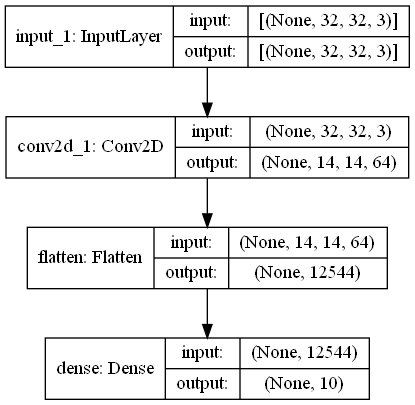

In [5]:
model.plot((32,32,3))

## 'tf.keras.utils.plot_model' cannot directly plot the subclassed model

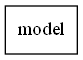

In [6]:
tf.keras.utils.plot_model(model)

## Import the decorator and define a build function

In [7]:
def plot_subclass_model(silent=False,show_shapes=True,**kwargs):
    '''
    This is a supplementary decorator to plot a subclassed model.
    Decorate it on Model.build to call `tf.keras.utils.plot_model`.
    Example:
    
    ```python
    class MyModel(tf.keras.Model):
    
      def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    
      def call(self, inputs):
        return self.dense(inputs)
        
      @plot_subclass_model()
      def build(self,input_shape):
        super().build(input_shape)
        
    model=MyModel()
    model.build((None,32,32,3))
    ```
    
    Args:
      silent: Whether to plot the model. If set to True, it will do nothing other than the `build` function. Default is False.
      kwargs: Args passed to `plot_model`. Arg `show_shapes` will pass True by default. See more in `tf.keras.utils.plot_model`.
    '''
    from functools import wraps
    
    kwargs['show_shapes']='show_shapes'
    
    def decorate(func):
        @wraps(func)
        def wrapper(self,input_shape):
            result=func(self,input_shape)

            if not silent:
                from tensorflow.keras import layers
                if isinstance(input_shape,(tuple,tf.TensorShape)):
                    inputs=layers.Input(input_shape[1:])
                elif isinstance(input_shape,list):
                    inputs=[layers.Input(s[1:]) for s in input_shape]
                else:
                    raise ValueError(f'Expect input_shape to be a shape or a list of shape, but received {type(input_shape)}')

                outputs=self.call(inputs)
                model=tf.keras.Model(inputs=inputs,outputs=outputs)
                plot_result=tf.keras.utils.plot_model(model,**kwargs)
                try:
                    from IPython.display import display
                    display(plot_result)
                except ImportError:
                    pass
            return result
        return wrapper
    return decorate

In [8]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1=layers.Conv2D(32,kernel_size=5,strides=2)
        self.conv2=layers.Conv2D(64,kernel_size=5,strides=2)
        self.flat=layers.Flatten()
        self.dense=layers.Dense(10)
        
    def call(self,inputs):
        x=self.conv1(inputs)
        x=self.conv2(inputs)
        x=self.flat(x)
        x=self.dense(x)
        return x
    
    # The only change
    @plot_subclass_model()
    def build(self,input_shape):
        super().build(input_shape)

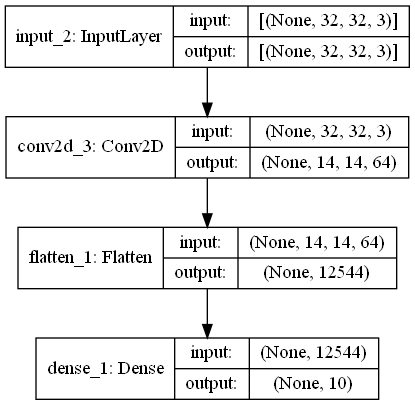

In [9]:
model=Model()
model.build((None,32,32,3))